Avaliação 2 - Inteligência Artificial

Resolução da atividade utilizando Redes Neurais

Passo 1 - Importar as bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

Passo 2 - Importar o dataset

In [ ]:
database = pd.read_excel("CCARDBALANCE.xlsx")

database.head(10)

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


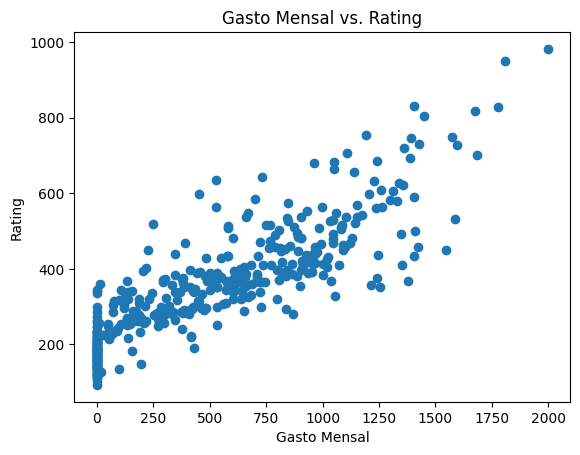

In [ ]:
plt.scatter(database[['Gasto Mensal']], database[['Rating']])
plt.xlabel("Gasto Mensal")
plt.ylabel("Rating")
plt.title("Gasto Mensal vs. Rating")
plt.show()

Passo 3 - Pré-Processamento dos dados e normalização

Inserção da variável que representará as características do conjunto dos dados. 

In [ ]:
X = database[['Renda','Limite','Rating','Cartoes','Idade','Educacao','Sexo','Estudante','Casado','Etnia']]

Após a inserção, inclui-se a função get_dummies()  para separar as colunas. Por exemplo: a coluna Sexo possui Male(1) ou Female(0). A função get_dummies() criará 2 colunas, uma Sexo_Female(onde caso seja mulher será 1 e caso não seja será 0) e outra Sexo_Male(onde caso seja homem será 1 e caso não seja será 0).

In [ ]:
X = pd.get_dummies(X, columns=['Sexo', 'Estudante', 'Casado', 'Etnia'], drop_first=True)

Inserção da variável de destino

In [ ]:
y = database['Gasto Mensal']

In [ ]:
X

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo_Female,Estudante_Yes,Casado_Yes,Etnia_Asian,Etnia_Caucasian
0,14.891,3606,283,2,34,11,False,False,True,False,True
1,106.025,6645,483,3,82,15,True,True,True,True,False
2,104.593,7075,514,4,71,11,False,False,False,True,False
3,148.924,9504,681,3,36,11,True,False,False,True,False
4,55.882,4897,357,2,68,16,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,False,False,True,False,True
396,13.364,3838,296,5,65,17,False,False,False,False,False
397,57.872,4171,321,5,67,12,True,False,True,False,True
398,37.728,2525,192,1,44,13,False,False,True,False,True


Passo 4 - Treinamento e Teste

In [ ]:
escala = StandardScaler()
X_norm = escala.fit_transform(X)

Aqui se utiliza a função train_test_split() para separar as variáveis: a que será as características e a que será o destino. Foi utilizado um test_size de 30% das amostras.

In [ ]:
X_norm_train,X_norm_teste,y_train,y_teste= train_test_split(X_norm, y, test_size=0.3)

Passo 5 - Processamento

Aqui se faz a montagem da rede neural.

In [ ]:
modelo = MLPRegressor(hidden_layer_sizes=(50, 30, 10), max_iter=500, alpha=0.001,
                      learning_rate_init=0.1,
                      solver="adam",
                      learning_rate="constant",
                      verbose=True
                     )
modelo.fit(X_norm_train,y_train)

Iteration 1, loss = 222554.53085464
Iteration 2, loss = 181627.44292840
Iteration 3, loss = 69055.58050341
Iteration 4, loss = 91304.19329812
Iteration 5, loss = 36514.27285824
Iteration 6, loss = 57945.41803993
Iteration 7, loss = 47151.62124309
Iteration 8, loss = 25262.76811137
Iteration 9, loss = 25367.87523800
Iteration 10, loss = 14129.99524777
Iteration 11, loss = 12734.72753962
Iteration 12, loss = 12659.95572161
Iteration 13, loss = 7021.96537670
Iteration 14, loss = 7475.18674513
Iteration 15, loss = 3786.05592760
Iteration 16, loss = 4284.44154967
Iteration 17, loss = 4160.43149160
Iteration 18, loss = 2989.76517554
Iteration 19, loss = 2777.39511767
Iteration 20, loss = 2180.16273025
Iteration 21, loss = 3081.33451668
Iteration 22, loss = 2100.15442925
Iteration 23, loss = 1910.46473923
Iteration 24, loss = 1425.98832046
Iteration 25, loss = 1540.51799530
Iteration 26, loss = 1612.79643196
Iteration 27, loss = 1232.72224770
Iteration 28, loss = 1148.13891195
Iteration 29, l

MLPRegressor(alpha=0.001, hidden_layer_sizes=(50, 30, 10),
             learning_rate_init=0.1, max_iter=500, verbose=True)

Passo 6- Pós-Processamento

In [ ]:
y_modelo_previsao = modelo.predict(X_norm_teste)

Cálculo de R²-> Quanto mais próximo de 1, melhor é a capacidade do modelo em explicar a variabilidade nos dados. 


Cálculo do Erro Médio Absoluto->Representa a média das diferenças absolutas entre os valores reais e as previsões.

Cálculo do Erro Quadrático Médio-> Representa a média dos quadrados das diferenças entre os valores reais e as previsões.

In [ ]:
r2 = r2_score(y_teste, y_modelo_previsao)
print('Cálculo do R²:',r2)

mae = mean_absolute_error(y_teste, previsoes_teste)
mse = mean_squared_error(y_teste, previsoes_teste)

print(f'Cálculo do Erro Médio Absoluto (MAE): {mae}')
print(f'Cálculo do Erro Quadrático Médio (MSE): {mse}')

Cálculo do R²: 0.9964755467212683
Cálculo do Erro Médio Absoluto (MAE): 500.80185632449803
Cálculo do Erro Quadrático Médio (MSE): 414073.06794681004


Gráfico para visualizar a proximidade dos dados previstos com os reais

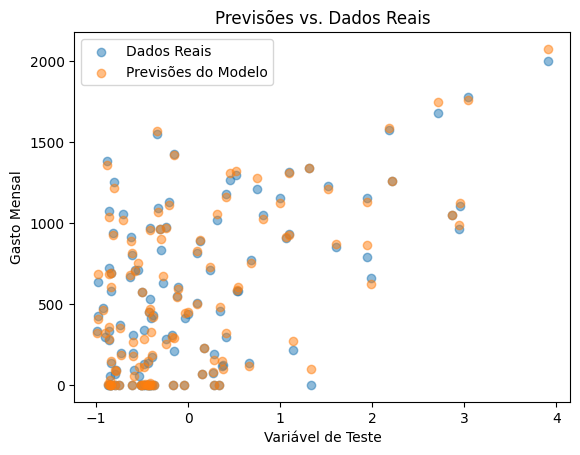

In [ ]:
plt.scatter(X_norm_teste[:, 0], y_teste, alpha=0.5, label='Dados Reais')
plt.scatter(X_norm_teste[:, 0], y_modelo_previsao, alpha=0.5, label='Previsões do Modelo')
plt.xlabel("Variável de Teste")
plt.ylabel("Gasto Mensal")
plt.title("Previsões vs. Dados Reais")
plt.legend()
plt.show()


Passo 7 -Previsão de um novo dado


In [ ]:
nomes_caracteristicas_treino = X.columns

nomes_caracteristicas_treino

Index(['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao',
       'Sexo_Female', 'Estudante_Yes', 'Casado_Yes', 'Etnia_Asian',
       'Etnia_Caucasian'],
      dtype='object')

In [ ]:
# Exemplo de novos dados a serem previstos
novos_dados = pd.DataFrame({
    'Renda': [50.000],
    'Limite': [2800],
    'Rating': [900],
    'Cartoes': [2],
    'Idade': [35],
    'Educacao': [16],
    'Sexo_Female': [0], 
    'Estudante_Yes': [1],
    'Casado_Yes': [1],
    'Etnia_Asian': [0],
    'Etnia_Caucasian': [1]
})
# Normalizar os novos dados usando o mesmo scaler
novos_dados_norm = escala.transform(novos_dados)
# Fazer previsões nos novos dados
previsoes = modelo.predict(novos_dados_norm)
# Exibir as previsões
print("Previsões:", previsoes)

Previsões: [1013.7325011]


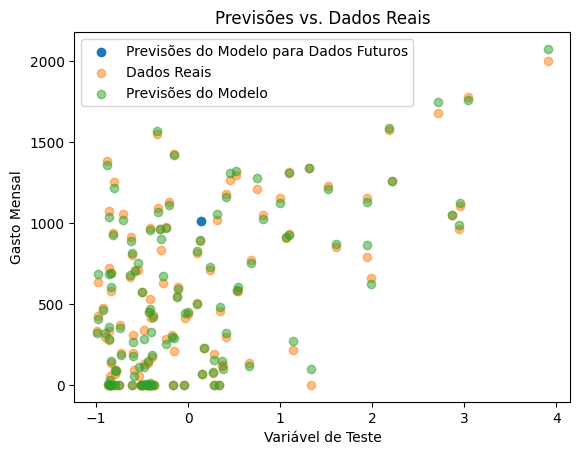

In [ ]:
import matplotlib.pyplot as plt


previsoes_novos_dados = modelo.predict(novos_dados_norm)

plt.scatter(novos_dados_norm[:, 0], previsoes_novos_dados, alpha=1, label='Previsões do Modelo para Dados Futuros')
plt.scatter(X_norm_teste[:, 0], y_teste, alpha=0.5, label='Dados Reais')
plt.scatter(X_norm_teste[:, 0], y_modelo_previsao, alpha=0.5, label='Previsões do Modelo')
plt.xlabel("Variável de Teste")
plt.ylabel("Gasto Mensal")
plt.title("Previsões vs. Dados Reais")
plt.legend()
plt.show()
